MODULES

In [341]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Theory on the Gradient Descent algorithm

In [342]:
# Function to be optimized

def f(x, y):
    return x**2 - 4*x + 3 + y**2

#Gradient: The gradient is calculated by taking the partial derivatives with respect to x & 𝑦

def grad_f(x, y):
    df_dx = 2*x - 4
    df_dy = 2*y
    return np.array([df_dx, df_dy])

In [343]:
#Parameters
learning_rate = 0.05
max_iter = 100  
tolerance = 0.00005

In [344]:
#Variables
x, y = 0.0, 0.0  
values = [(x, y)]  # Lista para almacenar el progreso

In [345]:
# Run gradient descent algorithm

for i in range(max_iter):  
    gradient = grad_f(x, y)  # Calculate the gradient of the function at the current point (x, y)
    x_new = x - learning_rate * gradient[0]  
    y_new = y - learning_rate * gradient[1]  

    # Check for convergence
    if np.linalg.norm([x_new - x, y_new - y]) < tolerance:  # Check if the norm of the change is less than the tolerance
        print(f"Convergence reached after {i+1} iterations.")  
        break  

    x, y = x_new, y_new  # Update x and y for the next iteration
    values.append((x, y))  # Store the values of x and y for plotting later

# Print the final results
print(f"Optimal value of x: {x}, y: {y}")  
print(f"Minimum value of the function: {f(x, y)}") 

Convergence reached after 80 iterations.
Optimal value of x: 1.9995145011099367, y: 0.0
Minimum value of the function: -0.9999997642908278


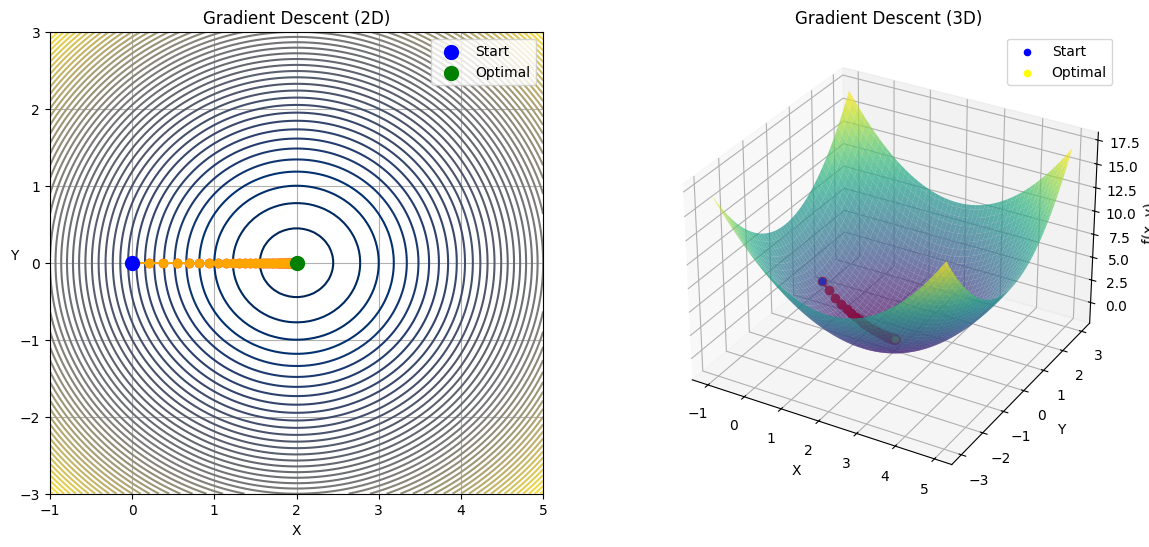

In [346]:
# Plot the results

values = np.array(values)
x_vals = values[:, 0]  
y_vals = values[:, 1] 

# Create a grid of x and y values for plotting the function
x_range = np.linspace(-1, 5, 100) 
y_range = np.linspace(-3, 3, 100)  
X, Y = np.meshgrid(x_range, y_range)  # Create a meshgrid for plotting
Z = f(X, Y)  # Compute Z values for the function f at each point in the meshgrid


fig = plt.figure(figsize=(14, 6))


def setup_2d_plot(ax, X, Y, Z, x_vals, y_vals):
    ax.contour(X, Y, Z, levels=50, cmap='cividis') 
    ax.plot(x_vals, y_vals, marker='o', color='orange')  
    ax.scatter(x_vals, y_vals, color='red')  
    
    
    ax.scatter(x_vals[0], y_vals[0], color='blue', label='Start', zorder=3, s=100)  
    ax.scatter(x_vals[-1], y_vals[-1], color='green', label='Optimal', zorder=3, s=100)  
    
    ax.set_title('Gradient Descent (2D)')  
    ax.set_xlabel('X')  
    ax.set_ylabel('Y', rotation="horizontal")  
    ax.legend() 
    ax.grid(True)  

def setup_3d_plot(ax, X, Y, Z, x_vals, y_vals, f):
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7) 
    ax.plot(x_vals, y_vals, f(x_vals, y_vals),marker='o', color='red' ) 
    ax.scatter(x_vals[0], y_vals[0], f(x_vals[0], y_vals[0]), color='blue', label='Start') 
    ax.scatter(x_vals[-1], y_vals[-1], f(x_vals[-1], y_vals[-1]), color='yellow', label='Optimal')  
    ax.set_title('Gradient Descent (3D)')  
    ax.set_xlabel('X')  
    ax.set_ylabel('Y')  
    ax.set_zlabel('f(x, y)')  
    ax.legend()


# Create subplots and configure them using the setup functions
ax1 = fig.add_subplot(1, 2, 1)  
setup_2d_plot(ax1, X, Y, Z, x_vals, y_vals)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')  
setup_3d_plot(ax2, X, Y, Z, x_vals, y_vals, f)

plt.show()  # Display the figure